# **1. 원본 데이터 셋**

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
import pandas as pd

finance = pd.read_csv('/content/drive/MyDrive/numble/재무데이터_피처생성추가_결측치제거.csv')
#finance.head(5)

In [ ]:
# finance = finance.rename(columns = {'매출액증가율 = (당기매출액 - 전기매출액) / 전기매출액' : '매출액증가율',
#                                     '영업이익증가율 = (당기영업이익 - 전기영업이익) / 전기영업이익' : '영업이익증가율'})

# 필요없는 칼럼 제거
# finance = finance.drop(['Unnamed: 76'], axis = 1)

In [ ]:
finance.columns

Index(['사업자번호', '기업명', '종업원 수', 'label', '결산년월', '유동자산', '매출채권', '비유동자산',
       '유형자산', '자산총계', '유동부채', '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）',
       '자본총계', '매출액', '판매비와관리비', '영업이익（손실）', '법인세비용차감전순손익', '법인세비용',
       '당기순이익(손실)', '기업순이익률(%)', '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)',
       '매출액영업이익률(%)', '매출액순이익률(%)', '수지비율(%)', '경상수지비율', '영업비율(%)',
       '금융비용대매출액비율(%)', '금융비용대부채비율(%)', '금융비용대총비용비율(%)', '부채비율(%)',
       '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)', '유동부채비율(%)', '비유동부채비율(%)',
       '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)', '매출채권회전율(회)', '매입채무회전율(회)',
       '미수금', '매출원가', '무형자산', '재고자산', '매출액증가율(%)', '영업이익증가율(%)', '총자산증가율(%)',
       '당기순이익률(%)', 'ROE(%)', 'ROA(%)', '유형자산증가율(%)', '이자비용', '총자산회전율(회)',
       '영업이익률(%)', '유동비율(%)', '유동부채대총자산(%)', '유동자산대총자산(%)', '이익잉여금대총자산(%)',
       '영업이익대총자산비율(%)', '총부채대총자산비율(%)', '이자보상비율(%)', '판매비와관리비 / 종업원수',
       '영업이익 / 종업원수', '자본금 / 종업원수', '당기순이익 / 종업원수', '영업이익대비이자보상비율(%)',
       '총자본순이익률(%)', '총자본영업이익률(%)', '총자본증가율(%)'

<br>

# **2. 결측치 시각화**

In [ ]:
# 그래프 한글깨짐 해결

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터프레임으로 결측치 개수 확인

missing2 = finance.isnull().sum()
missing = missing2.to_frame(name = 'missing_value')
missing[60:]

,missing_value
유동부채대총자산(%),1151
유동자산대총자산(%),1000
이익잉여금대총자산(%),1283
영업이익대총자산비율(%),1108
총부채대총자산비율(%),1077
이자보상비율(%),18221
판매비와관리비 / 종업원수,5180
영업이익 / 종업원수,3926
자본금 / 종업원수,3926
당기순이익 / 종업원수,3926


In [ ]:
3# 결측치 시각화하기 위해 칼럼 10개씩 분리

finance1 = finance[['사업자번호', '기업명', '종업원 수', 'label', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계']]
finance2 = finance[['유동부채', '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비', '영업이익（손실）',
                    '법인세비용차감전순손익']]
finance3 = finance[['법인세비용', '당기순이익(손실)', '기업순이익률(%)', '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)',
                    '매출액순이익률(%)', '수지비율(%)', '경상수지비율']]
finance4 = finance[['영업비율(%)','금융비용대매출액비율(%)', '금융비용대부채비율(%)', '금융비용대총비용비율(%)', '부채비율(%)', '차입금의존도(%)','자기자본비율(%)',
                    '순운전자본비율(%)', '유동부채비율(%)', '비유동부채비율(%)']]
finance5 = finance[['부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)', '매출채권회전율(회)', '매입채무회전율(회)', '미수금', '매출원가',
                    '무형자산', '재고자산', '매출액증가율(%)']]
finance6 = finance[['영업이익증가율(%)', '총자산증가율(%)', '당기순이익률(%)', 'ROE(%)', 'ROA(%)', '유형자산증가율(%)', '이자비용', '총자산회전율(회)', 
                    '영업이익률(%)', '유동비율(%)']]               
finance7 = finance[['유동부채대총자산(%)', '유동자산대총자산(%)', '이익잉여금대총자산(%)', '영업이익대총자산비율(%)', '총부채대총자산비율(%)', '이자보상비율(%)',
                    '판매비와관리비 / 종업원수', '영업이익 / 종업원수', '자본금 / 종업원수', '당기순이익 / 종업원수']]
finance8 = finance[['영업이익대비이자보상비율(%)', '총자본순이익률(%)', '총자본영업이익률(%)', '총자본증가율(%)', '비유동비율(%)', '이익잉여금대유동자산비율(%)']]

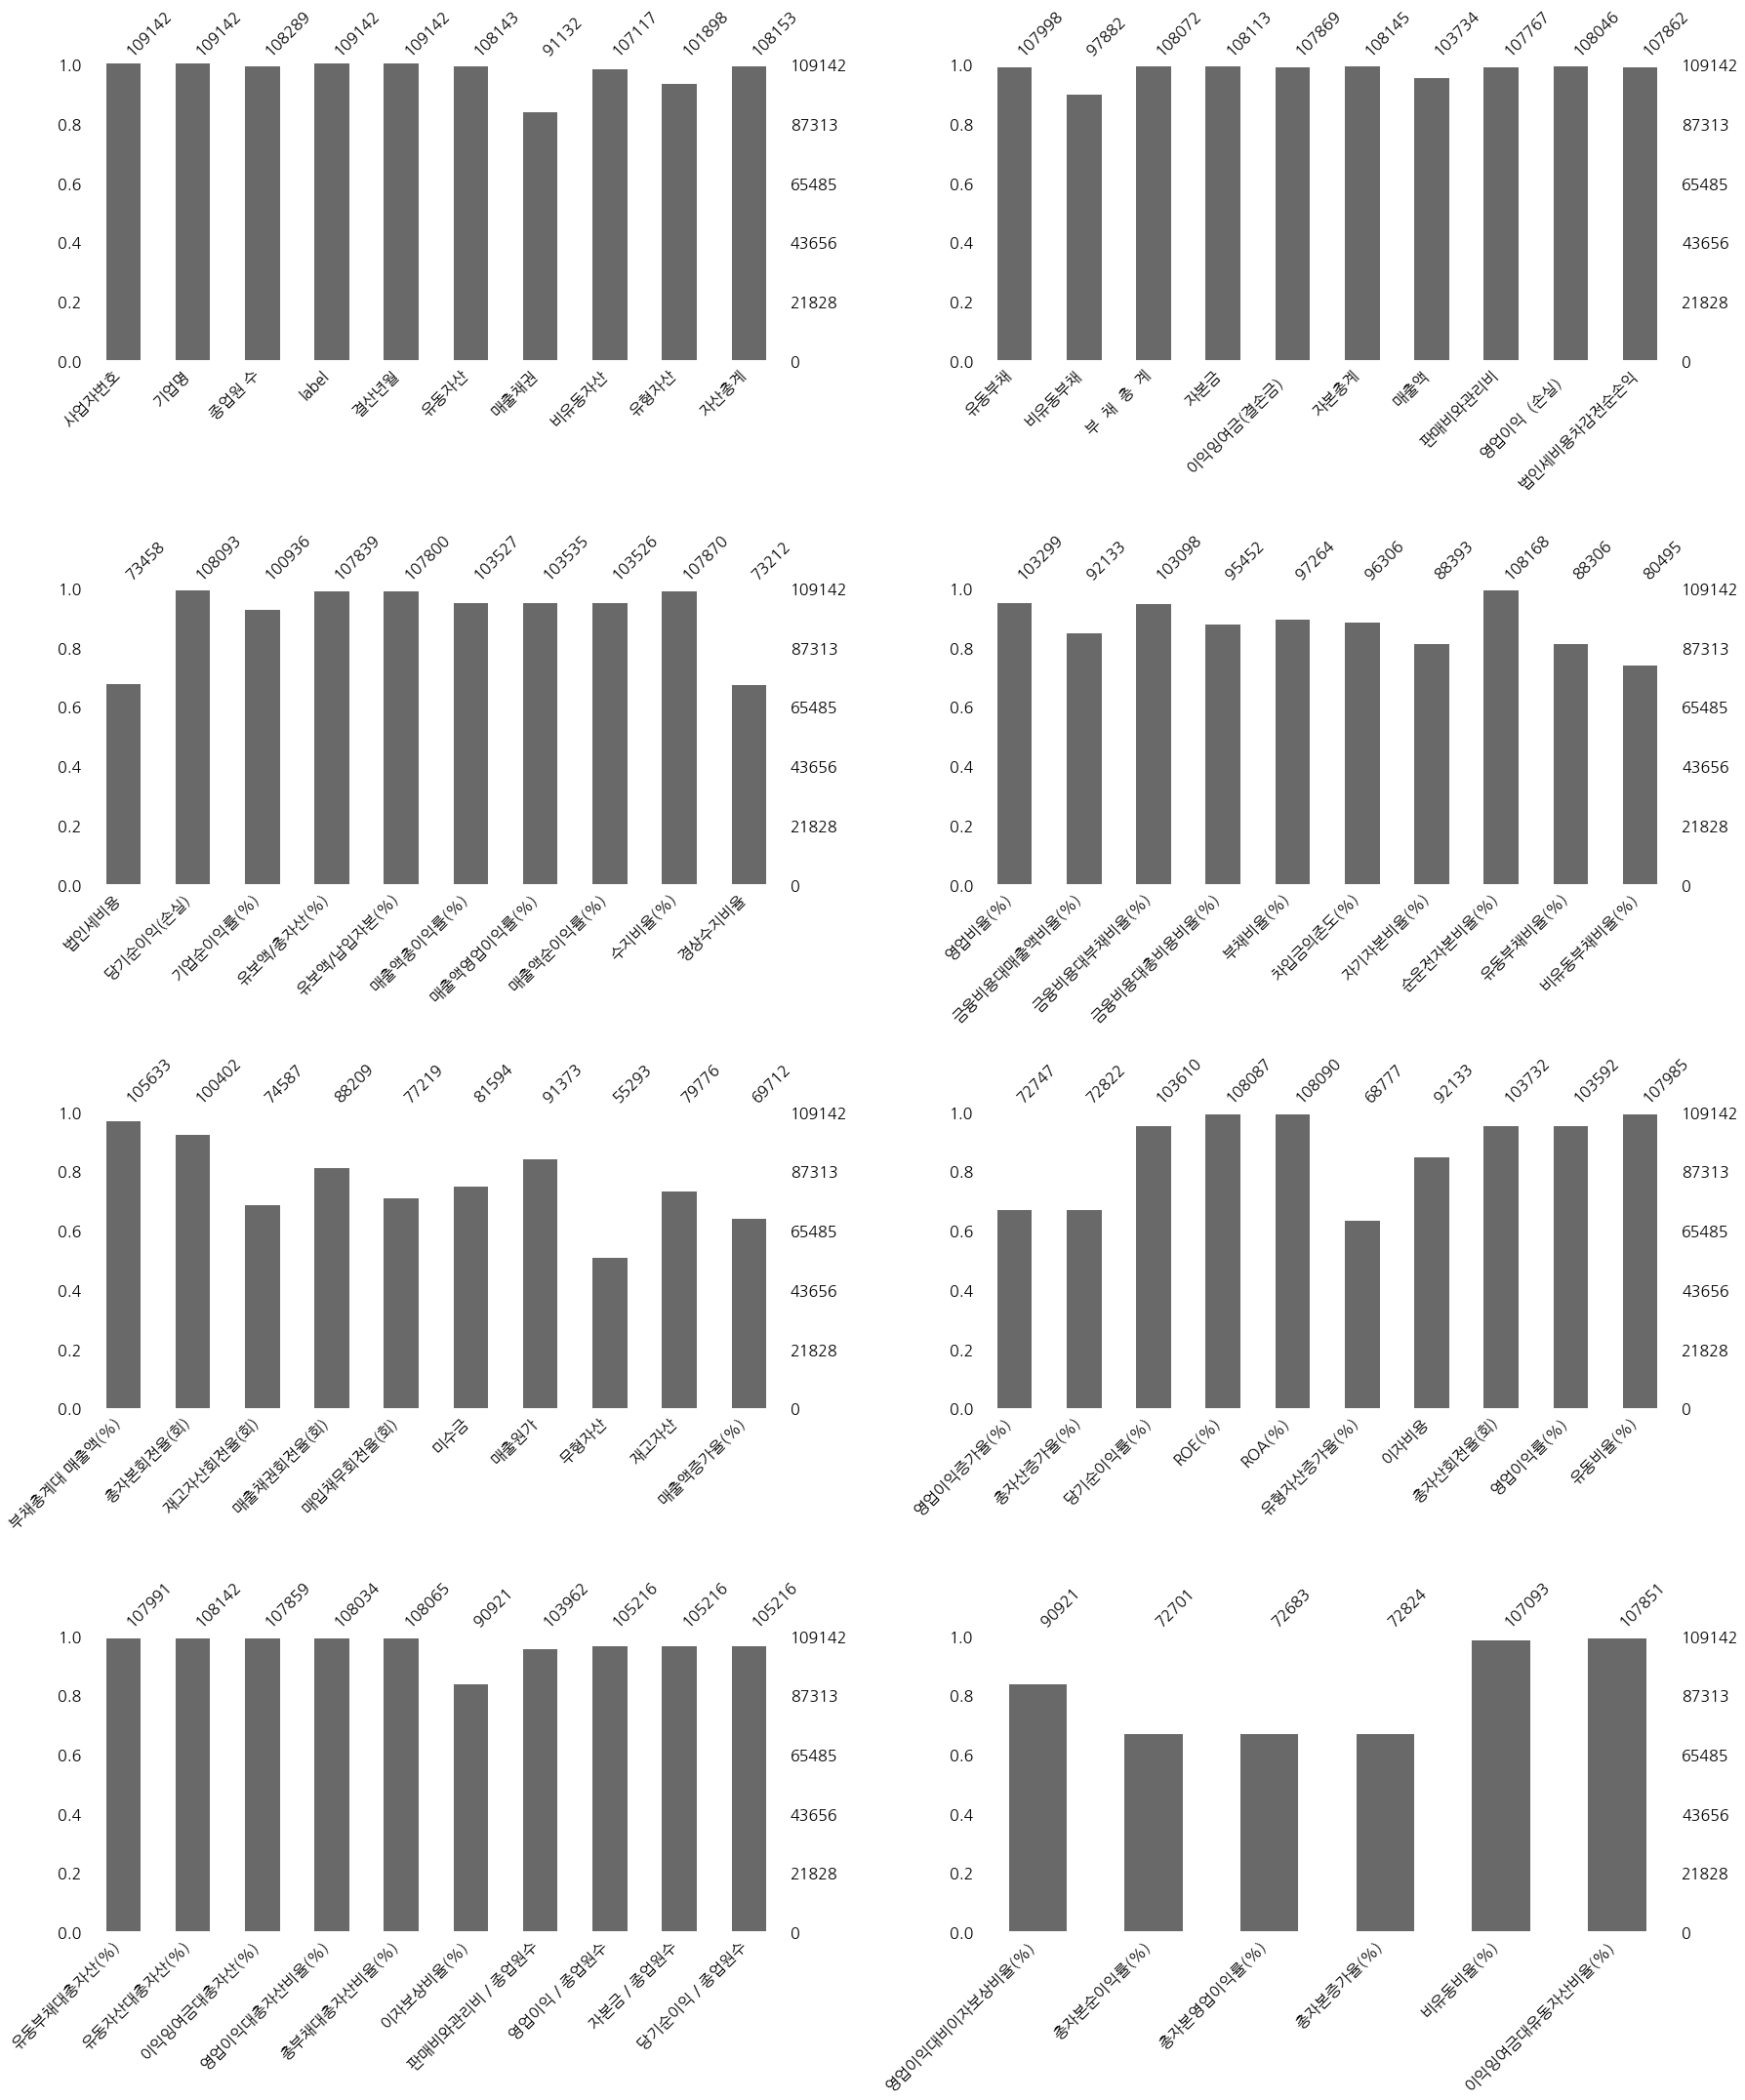

In [ ]:
# y축은 결측치 없이 데이터가 채워져 있는 비율
# 그래프 상단의 숫자는 데이터가 채워져 있는 개수

import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

fig , ax = plt.subplots(4,2,figsize=(25,30))
axes = ax.flatten()

msno.bar(finance1, ax = axes[0])
msno.bar(finance2, ax = axes[1])
msno.bar(finance3, ax = axes[2])
msno.bar(finance4, ax = axes[3])
msno.bar(finance5, ax = axes[4])
msno.bar(finance6, ax = axes[5])
msno.bar(finance7, ax = axes[6])
msno.bar(finance8, ax = axes[7])


# plt.subplots(constrained_layout=True)
plt.tight_layout(h_pad=3, w_pad=3)

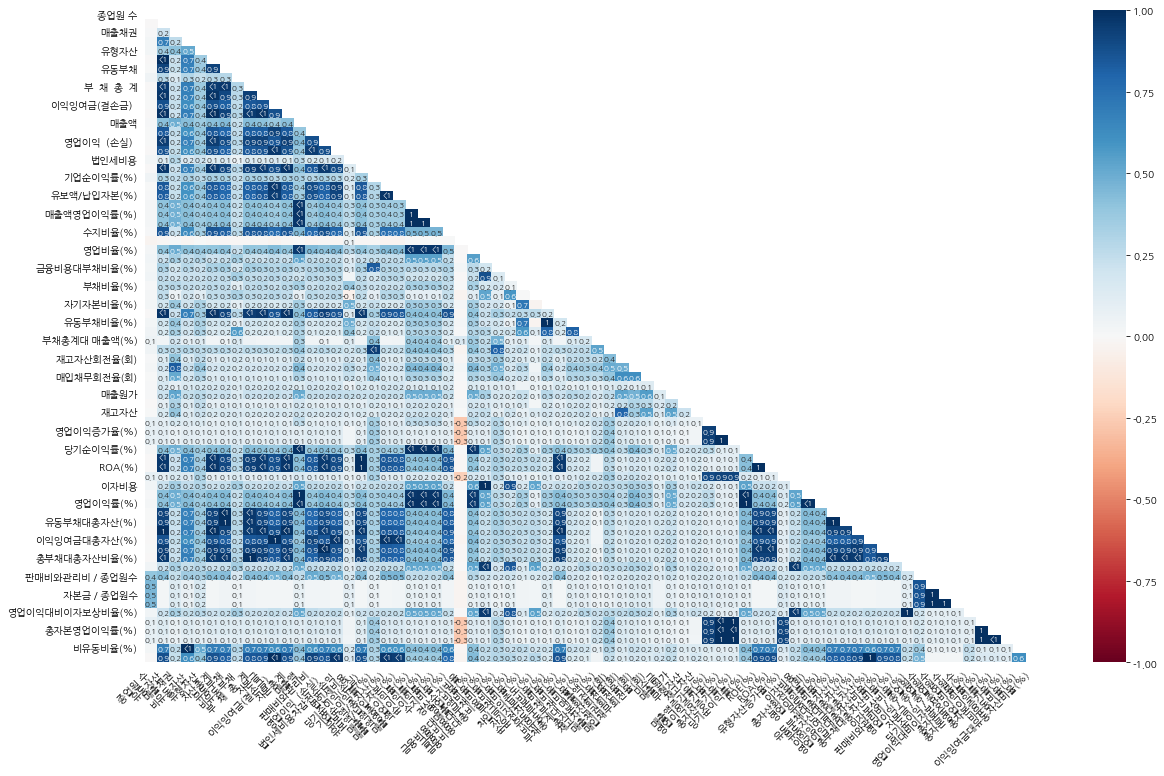

In [ ]:
#  한 변수의 존재 여부가 다른 변수의 존재에 얼마나 강하게 영향을 미치는지 상관관계를 측정함
# -1 : 한 변수가 나타나면 다른 변수는 확실히 없음
# 0 : 변수가 나타나거나 나타나지 않거나 영향을 미치지 않음
# 1 : 한 변수가 나타나면 다른 변수도 분명히 영향을 받음

msno.heatmap(finance, fontsize = 10)

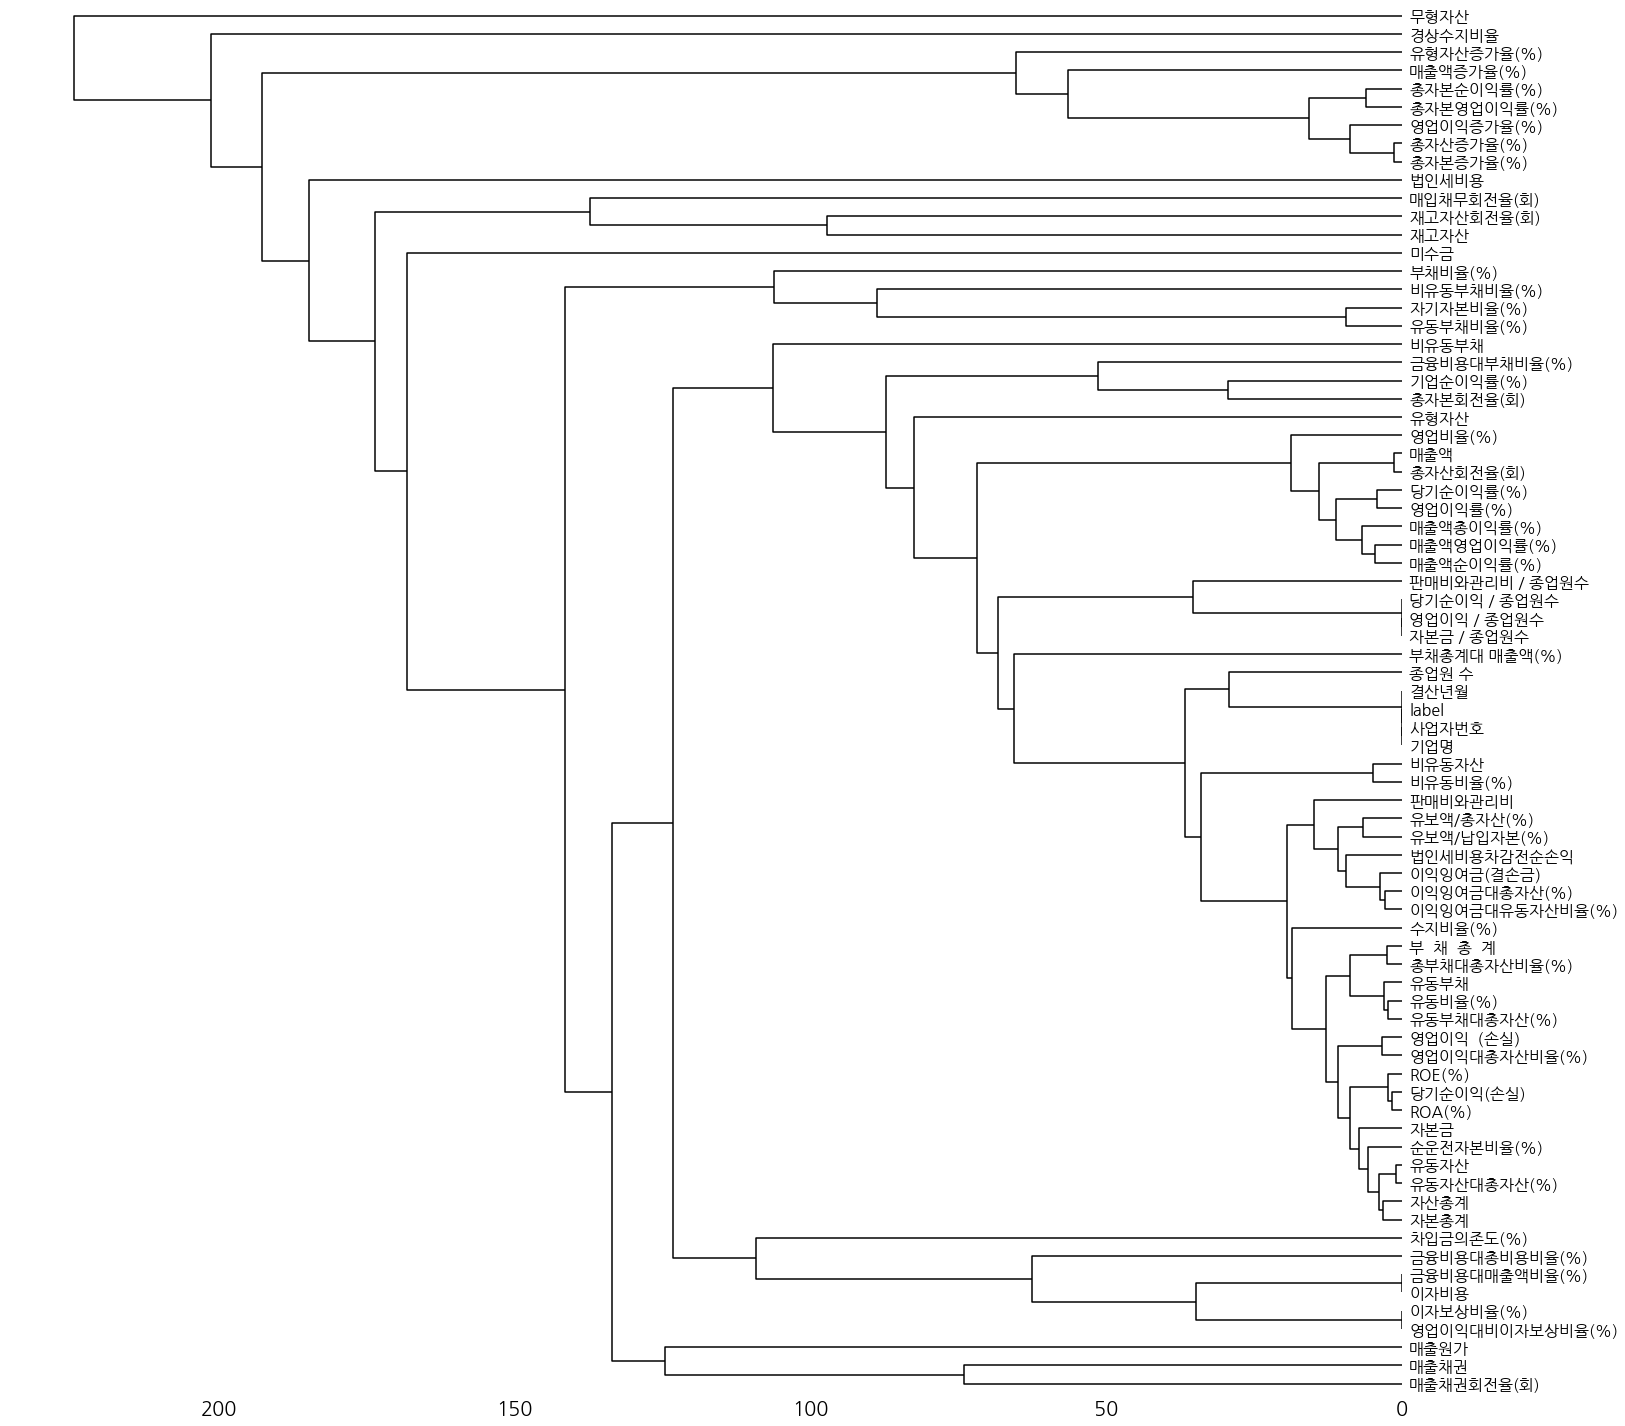

In [ ]:
# 변수 간의 상관관계를 보다 완벽하게 파악할 수 있음
# 상관관계 히트맵에서 볼 수 있는 쌍별 추세보다 더 깊은 추세를 확인할 수 있음

msno.dendrogram(finance)

<br>

# **3. 수치형, 범주형 변수 구분**

In [ ]:
# 타입 변환 전
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109142 entries, 0 to 109141
Data columns (total 76 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   사업자번호            109142 non-null  int64  
 1   기업명              109142 non-null  object 
 2   종업원 수            108289 non-null  float64
 3   label            109142 non-null  int64  
 4   결산년월             109142 non-null  int64  
 5   유동자산             108143 non-null  float64
 6   매출채권             91132 non-null   float64
 7   비유동자산            107117 non-null  float64
 8   유형자산             101898 non-null  float64
 9   자산총계             108153 non-null  float64
 10  유동부채             107998 non-null  float64
 11  비유동부채            97882 non-null   float64
 12  부  채  총  계       108072 non-null  float64
 13  자본금              108113 non-null  float64
 14  이익잉여금(결손금）       107869 non-null  float64
 15  자본총계             108145 non-null  float64
 16  매출액              103734 non-null  floa

In [ ]:
# 사업자번호, label, 결산년월 -> 범주형으로 변경

finance['사업자번호'] = finance['사업자번호'].astype(object)
finance['label'] = finance['label'].astype(object)
finance['결산년월'] = finance['결산년월'].astype(object)

In [ ]:
# 범주형 변수 확인
finance.dtypes[finance.dtypes == 'object']

사업자번호    object
기업명      object
label    object
결산년월     object
dtype: object

In [ ]:
# 수치형 변수 확인
finance.dtypes[finance.dtypes == 'float64']

종업원 수              float64
유동자산               float64
매출채권               float64
비유동자산              float64
유형자산               float64
                    ...   
총자본순이익률(%)         float64
총자본영업이익률(%)        float64
총자본증가율(%)          float64
비유동비율(%)           float64
이익잉여금대유동자산비율(%)    float64
Length: 72, dtype: object

In [ ]:
# 한번에 확인
finance.dtypes

사업자번호               object
기업명                 object
종업원 수              float64
label               object
결산년월                object
                    ...   
총자본순이익률(%)         float64
총자본영업이익률(%)        float64
총자본증가율(%)          float64
비유동비율(%)           float64
이익잉여금대유동자산비율(%)    float64
Length: 76, dtype: object

<br>

# **4. 단변량 분석**

In [ ]:
finance.columns

Index(['사업자번호', '기업명', '종업원 수', 'label', '결산년월', '유동자산', '매출채권', '비유동자산',
       '유형자산', '자산총계', '유동부채', '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）',
       '자본총계', '매출액', '판매비와관리비', '영업이익（손실）', '법인세비용차감전순손익', '법인세비용',
       '당기순이익(손실)', '기업순이익률(%)', '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)',
       '매출액영업이익률(%)', '매출액순이익률(%)', '수지비율(%)', '경상수지비율', '영업비율(%)',
       '금융비용대매출액비율(%)', '금융비용대부채비율(%)', '금융비용대총비용비율(%)', '부채비율(%)',
       '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)', '유동부채비율(%)', '비유동부채비율(%)',
       '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)', '매출채권회전율(회)', '매입채무회전율(회)',
       '미수금', '매출원가', '무형자산', '재고자산', '매출액증가율(%)', '영업이익증가율(%)', '총자산증가율(%)',
       '당기순이익률(%)', 'ROE(%)', 'ROA(%)', '유형자산증가율(%)', '이자비용', '총자산회전율(회)',
       '영업이익률(%)', '유동비율(%)', '유동부채대총자산(%)', '유동자산대총자산(%)', '이익잉여금대총자산(%)',
       '영업이익대총자산비율(%)', '총부채대총자산비율(%)', '이자보상비율(%)', '판매비와관리비 / 종업원수',
       '영업이익 / 종업원수', '자본금 / 종업원수', '당기순이익 / 종업원수', '영업이익대비이자보상비율(%)',
       '총자본순이익률(%)', '총자본영업이익률(%)', '총자본증가율(%)'

In [ ]:
rate1 = ['매출액증가율(%)', '영업이익증가율(%)', '총자산증가율(%)', '유형자산증가율(%)']
rate2 = ['총자본증가율(%)', '판매비와관리비 / 종업원수', '영업이익 / 종업원수', '자본금 / 종업원수']
rate3 = ['당기순이익 / 종업원수', '당기순이익률(%)', 'ROE(%)', 'ROA(%)']
rate4 = ['영업이익률(%)', '유동비율(%)', '유동부채대총자산(%)', '유동자산대총자산(%)']
rate5 = ['이익잉여금대총자산(%)', '영업이익대총자산비율(%)', '총부채대총자산비율(%)', '이자보상비율(%)']
rate6 = ['영업이익대비이자보상비율(%)', '총자본순이익률(%)', '총자본영업이익률(%)', '이자비용']
rate7 = ['총자산회전율(회)', '비유동비율(%)', '이익잉여금대유동자산비율(%)']

In [ ]:
# 수치형 변수 단변량 분석
import seaborn as sns

def UVA_numeric(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True) # 확률밀도그래프 생성
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    # plt.xlim(-1, 2)
    # plt.ylim(-1, 6)
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

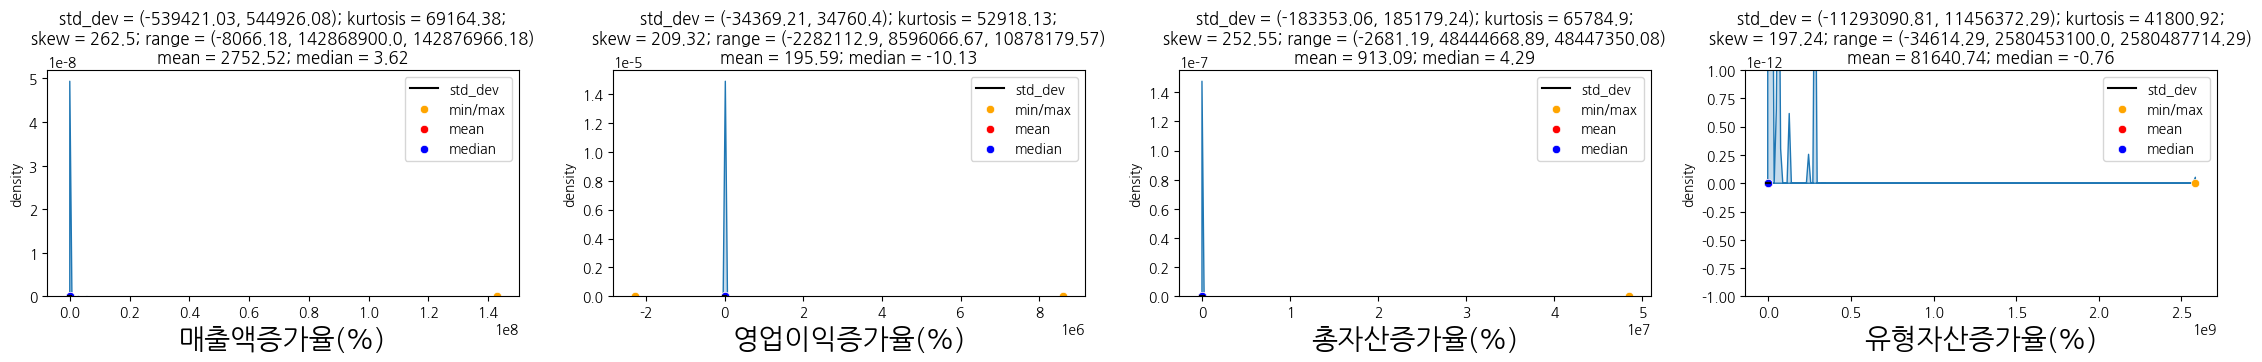

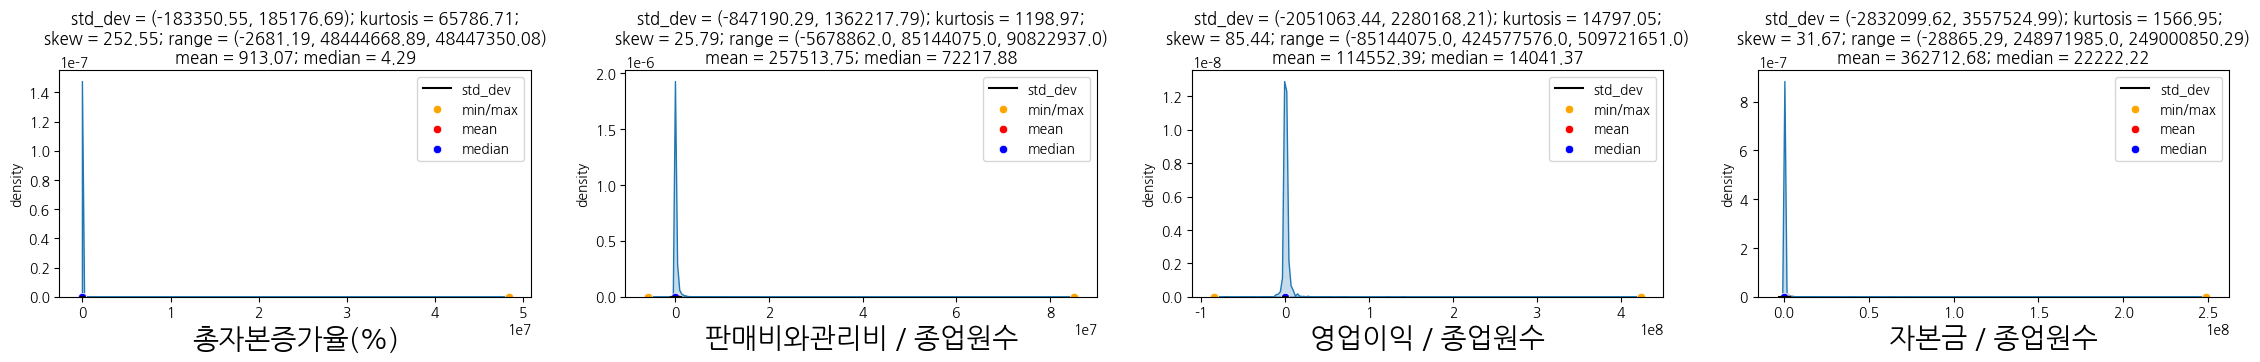

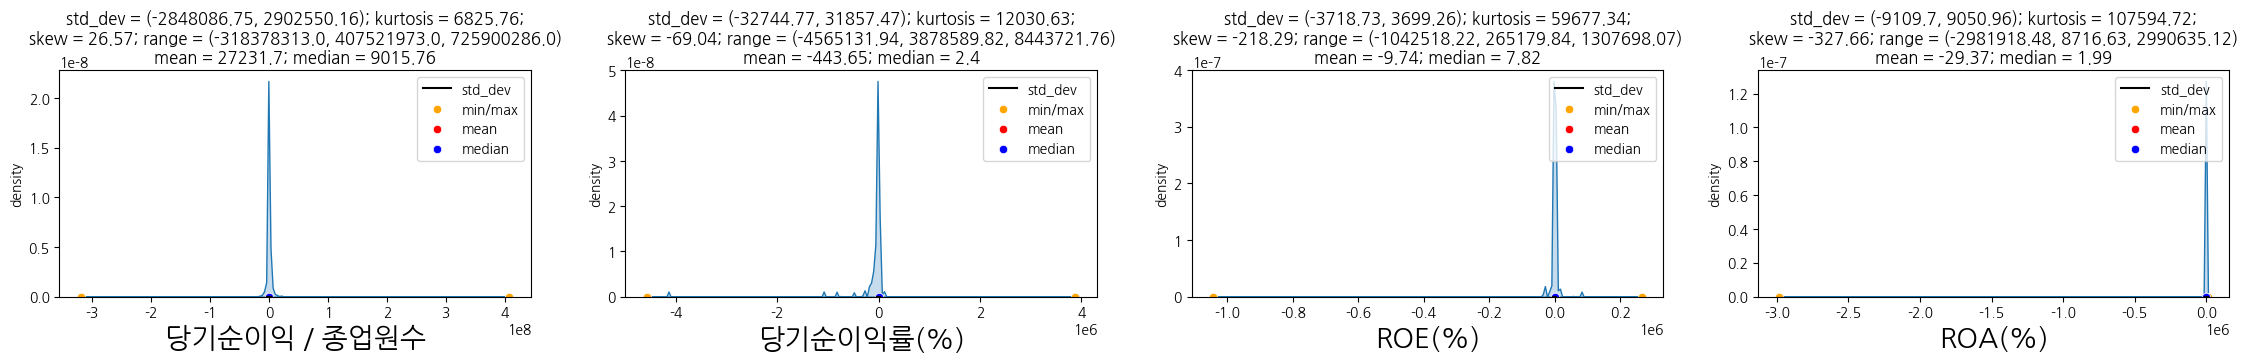

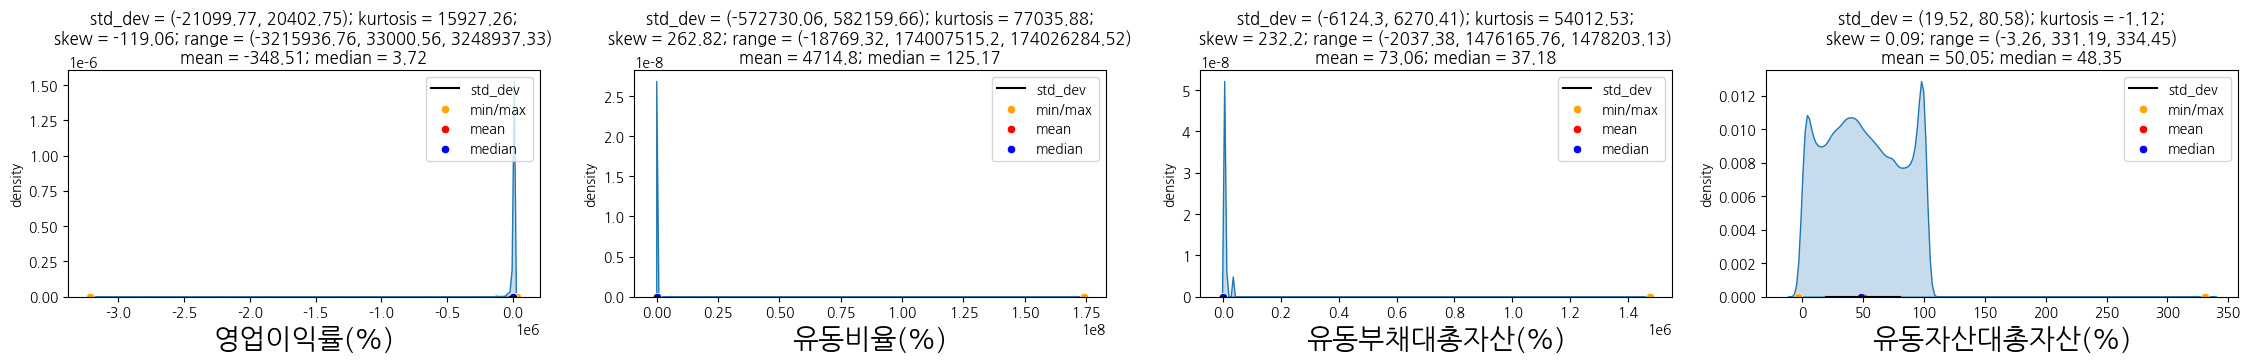

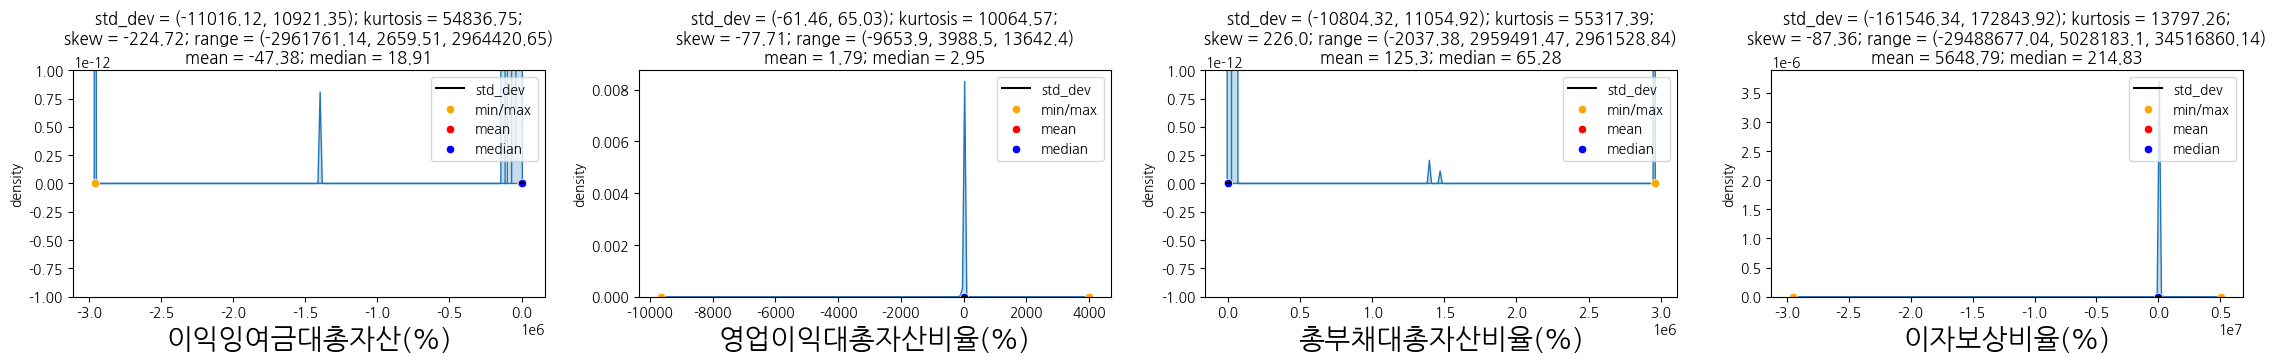

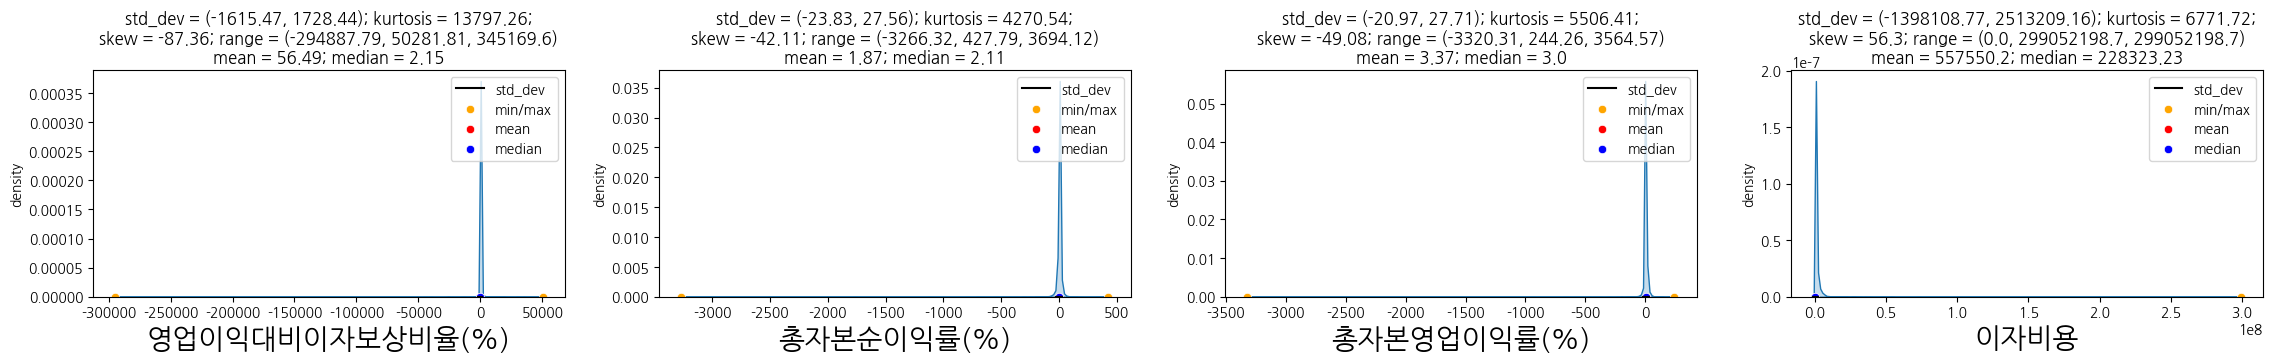

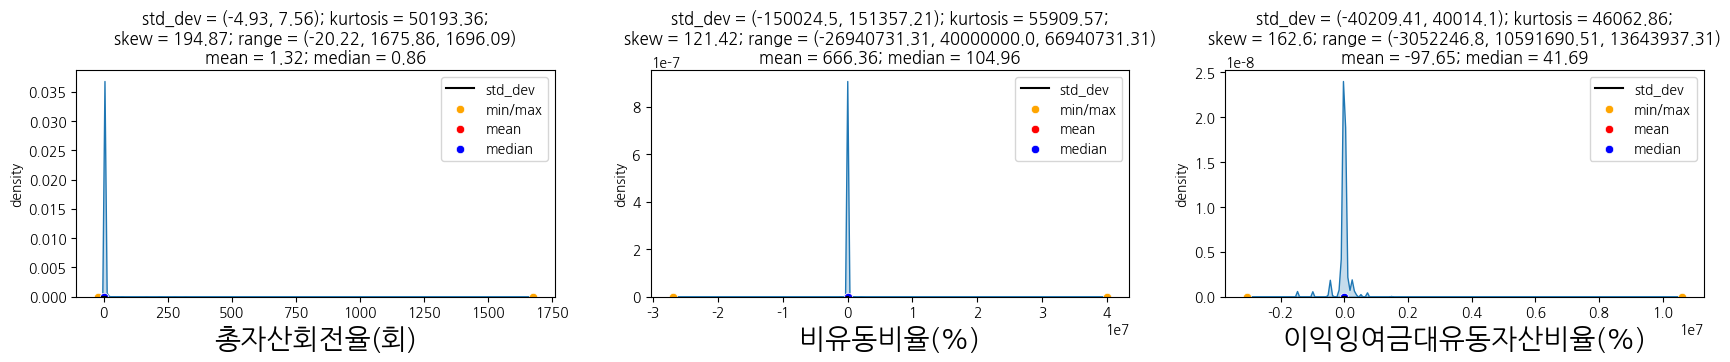

In [ ]:
UVA_numeric(finance, rate1)
UVA_numeric(finance, rate2)
UVA_numeric(finance, rate3)
UVA_numeric(finance, rate4)
UVA_numeric(finance, rate5)
UVA_numeric(finance, rate6)
UVA_numeric(finance, rate7)

(0.0, 1.0)

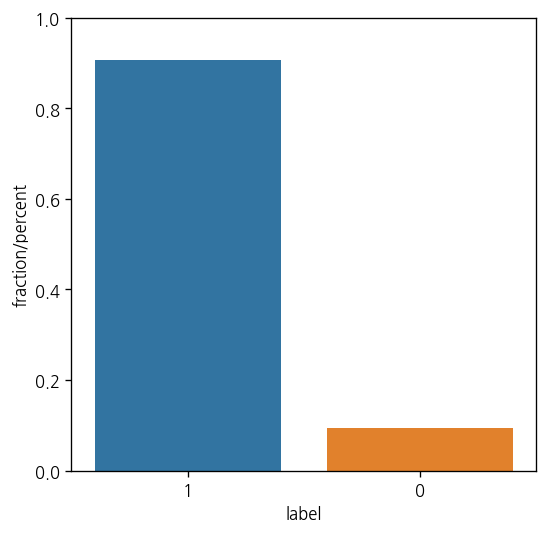

In [ ]:
# 범주형 변수 label 단변량 분석

plt.figure(figsize = (5,5), dpi = 120)
label_count = finance['label'].value_counts(normalize=True)
sns.barplot(label_count.index, label_count , order = label_count.index)
plt.xlabel('label')
plt.ylabel('fraction/percent')
plt.ylim(0,1)

<br>

# **5. 범주화(binning)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/numble/finaldata_Eng_BIZ.csv')
#df.head(5)

In [ ]:
df.columns

Index(['BIZ_NO', 'ESTB_DATE', 'LIST_DATE', 'employee', 'label', 'Date',
       'currentAsset', 'saleCredit', 'noCurrentAsset', 'tangibleAsset',
       'totalAsset', 'currentDept', 'noCurrentDept', 'totalDept', 'capital',
       '이익잉여금(결손금）', 'totalCapital', 'sales', 'sellingAndAdmin', '영업이익（손실）',
       'loss', 'texExpense', 'profit', 'finNetIncome', 'standby/totalAsset',
       'standby/paid-in', 'grossProfitOnSale', 'grossProfit', 'grossProfitNet',
       'inexped', 'currentAccount', 'operatingRatio', 'sales/finCharge',
       'dept/finCharge', 'totalcost/finCharge', 'deptRatio', 'toalBorrowing',
       'stockholderAsset', 'netWorkingCapital', 'currentDeptRatio',
       'noCurrentDeptRatio', 'sales/totalDept', 'totalCapitalTurnover',
       'inventoryTurnover', 'receivablesTurnover', 'payablesTurnover',
       'outstandingAmount', 'salesCost', 'intangibleAsset', 'inventory',
       'netSalesGrowth', 'operatingProfitGrowth', 'totalAssetGrowth',
       'profitRatio', 'ROE', 'ROA', 'tan

In [ ]:
columns = df.columns[1:4]
columns = columns.append(df.columns[6:])
columns
# len(columns)

Index(['ESTB_DATE', 'LIST_DATE', 'employee', 'currentAsset', 'saleCredit',
       'noCurrentAsset', 'tangibleAsset', 'totalAsset', 'currentDept',
       'noCurrentDept', 'totalDept', 'capital', '이익잉여금(결손금）', 'totalCapital',
       'sales', 'sellingAndAdmin', '영업이익（손실）', 'loss', 'texExpense', 'profit',
       'finNetIncome', 'standby/totalAsset', 'standby/paid-in',
       'grossProfitOnSale', 'grossProfit', 'grossProfitNet', 'inexped',
       'currentAccount', 'operatingRatio', 'sales/finCharge', 'dept/finCharge',
       'totalcost/finCharge', 'deptRatio', 'toalBorrowing', 'stockholderAsset',
       'netWorkingCapital', 'currentDeptRatio', 'noCurrentDeptRatio',
       'sales/totalDept', 'totalCapitalTurnover', 'inventoryTurnover',
       'receivablesTurnover', 'payablesTurnover', 'outstandingAmount',
       'salesCost', 'intangibleAsset', 'inventory', 'netSalesGrowth',
       'operatingProfitGrowth', 'totalAssetGrowth', 'profitRatio', 'ROE',
       'ROA', 'tangibleAssetGrowth', 'cost', 

In [ ]:
# qcut을 사용하여 구간별 데이터 개수 같도록 7개로 분리

for i in range(len(columns)):
  df[f'{columns[i]}_bin'] = pd.qcut(df[columns[i]], q=7, labels = [1,2,3,4,5,6,7], duplicates='drop')

In [ ]:
# 잘못 만든 칼럼 삭제

# for i in range(74):
#   df = df.drop(f'{columns[i]}_bin{i}', axis = 1)

In [ ]:
df.columns

Index(['BIZ_NO', 'ESTB_DATE', 'LIST_DATE', 'employee', 'label', 'Date',
       'currentAsset', 'saleCredit', 'noCurrentAsset', 'tangibleAsset',
       ...
       'sell/emp_bin', 'bpro/emp_bin', 'capital/emp_bin', 'profit/emp_bin',
       'bprofit/ICR_bin', 'totalCapitalNet_bin', 'totalCapitalbpro_bin',
       'totalCapitalGrowth_bin', 'noCurrentRatio_bin',
       'currentAsset/earnedSurplus_bin'],
      dtype='object', length=151)

In [ ]:
# 결과물 csv 파일로 저장

# df.to_csv('/content/drive/MyDrive/numble/binning_data.csv')

In [ ]:
df['points_bin50'].value_counts()

2    14803
3    14803
1    14802
7    14802
5    14801
4    14800
6    14799
Name: points_bin50, dtype: int64

In [ ]:
# # 매개변수들만 binning된 결과

# grouped_col_1 = df.ESTB_DATE.groupby(df.points_bin0)

# # grouped_col_1 내용 확인
# # for key, group in grouped_col_1:
# #     print("* key", key)
# #     print("* count", len(group))
# #     print(group.head(10))
# #     print('\n')

# # grouped_col_1의 group별 기초통계 구하기
# grouped_col_1.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
points_bin0,,,,,
1,15474,58.127633,15.342108,3.0,81.0
2,15394,101.893205,12.203105,82.0,123.0
3,15249,146.839465,14.297210,124.0,173.0
4,15281,199.552516,15.546654,174.0,227.0
5,15310,254.168256,14.319047,228.0,277.0
6,15228,312.119057,22.892221,278.0,357.0
7,15231,470.631672,107.690174,358.0,1629.0


In [ ]:
# 범주화된 피처로 그룹별 부도율 계산(0일때가 부도)

grouped_col_2 = df.label.groupby(df.points_bin73)

# grouped_col_1 내용 확인
for key, group in grouped_col_2:
    print("* key", key)
    print("* count", len(group))
    # print(group.head())
    print(group.value_counts(normalize = True))
    print('\n')


* key 1
* count 15408
1    0.846898
0    0.153102
Name: label, dtype: float64


* key 2
* count 15407
1    0.901928
0    0.098072
Name: label, dtype: float64


* key 3
* count 15407
1    0.862465
0    0.137535
Name: label, dtype: float64


* key 4
* count 15408
1    0.891809
0    0.108191
Name: label, dtype: float64


* key 5
* count 15406
1    0.925289
0    0.074711
Name: label, dtype: float64


* key 6
* count 15407
1    0.954631
0    0.045369
Name: label, dtype: float64


* key 7
* count 15408
1    0.965408
0    0.034592
Name: label, dtype: float64


